In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
#source: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv
#https://www.kaggle.com/anshuls235/covid19-explained-through-visualizations


df = df.melt(id_vars=['UID',
                 'iso2',
                 'iso3',
                 'code3',
                 'FIPS',
                 'Admin2',
                 'Province_State',
                 'Country_Region',
                 'Lat',
                 'Long_',
                 'Combined_Key'], 
        var_name="Date", 
        value_name="Confirmed Cases")



df['Date'] = pd.to_datetime(df['Date'])

df.Date.max()

Timestamp('2021-12-24 00:00:00')

In [3]:
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed Cases
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",2020-01-22,0
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",2020-01-22,0
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",2020-01-22,0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",2020-01-22,0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",2020-01-22,0


# Cleaning

In [4]:
df_st = df.groupby(['Province_State','Date'],as_index=False).sum('Confirmed Cases')[['Province_State','Date','Confirmed Cases']]

df_st = df_st.sort_values(by=['Province_State', 'Date'])
df_st['Confirmed Cases']=df_st['Confirmed Cases'].astype('int')
#df_st['Date']=df_st['Date'].astype('object')
df_st['new_cases']=df_st.groupby(['Province_State'])[['Confirmed Cases']].diff().fillna(0)
df_st['Confirmed_Cases_log']= np.log(df_st['Confirmed Cases']+1)
df_st.head()

,Province_State,Date,Confirmed Cases,new_cases,Confirmed_Cases_log
0,Alabama,2020-01-22,0,0.0,0.0
1,Alabama,2020-01-23,0,0.0,0.0
2,Alabama,2020-01-24,0,0.0,0.0
3,Alabama,2020-01-25,0,0.0,0.0
4,Alabama,2020-01-26,0,0.0,0.0


# State

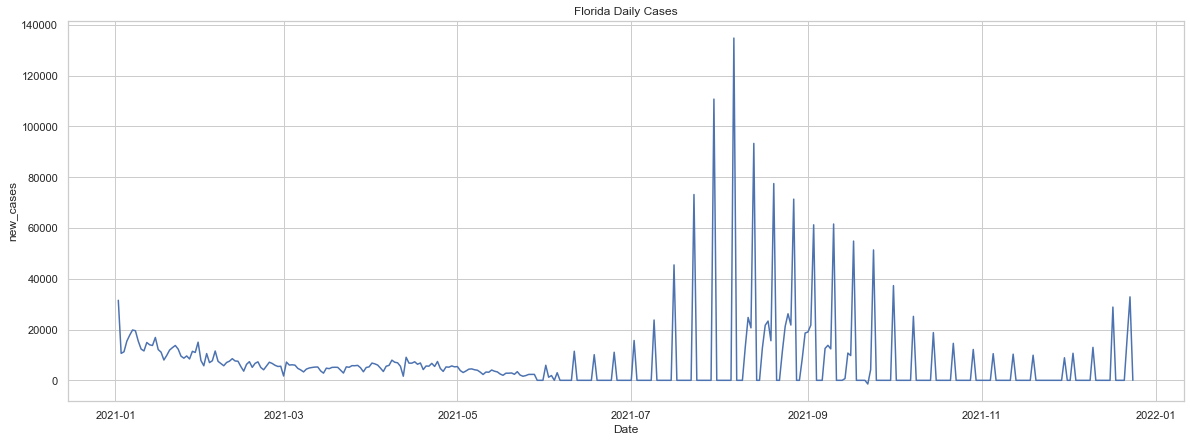

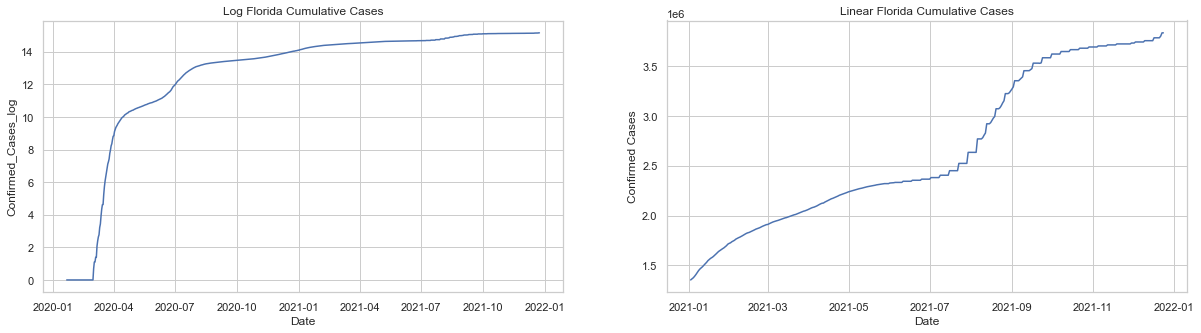

In [5]:
x = 'Florida'
y = '01-01-2021'


z=df_st[(df_st['Province_State']==x) & (df_st['Date']>y)]

plt.figure(figsize=(20,7))
ax = sns.lineplot(x='Date', y= "new_cases",data= z )
ax.set_title(x + ' Daily Cases')


fig, axs = plt.subplots(ncols=2,figsize=(20.5,5))

ax = sns.lineplot(x='Date', y= "Confirmed_Cases_log",data= df_st[df_st['Province_State']==x],ax=axs[0])
ax.set_title('Log '+ x + ' Cumulative Cases')
#ax.set(xscale='log')

bx= sns.lineplot(x='Date', y= "Confirmed Cases",data= z,ax=axs[1])
bx.set_title('Linear '+ x + ' Cumulative Cases')
#bx.set(xscale='linear')


plt.show()

#https://www.weforum.org/agenda/2020/04/covid-19-spread-logarithmic-graph/

In [6]:
df_st[(df_st['Date']=='2021-11-28')].sort_values(by='Confirmed_Cases_log',ascending=False).head(10)

,Province_State,Date,Confirmed Cases,new_cases,Confirmed_Cases_log
4191,California,2021-11-28,5077336,14837.0,15.440297
35123,Texas,2021-11-28,4321134,0.0,15.279029
8409,Florida,2021-11-28,3721503,0.0,15.129638
25984,New York,2021-11-28,2715335,4828.0,14.814426
12627,Illinois,2021-11-28,1784900,0.0,14.394874
30905,Pennsylvania,2021-11-28,1725902,4159.0,14.361261
28796,Ohio,2021-11-28,1677741,4245.0,14.332959
9112,Georgia,2021-11-28,1659491,0.0,14.322022
26687,North Carolina,2021-11-28,1524078,0.0,14.236901
18954,Michigan,2021-11-28,1447230,0.0,14.185163


# County

In [7]:
#df_st = df.groupby(['Province_State','Date'],as_index=False).sum('Confirmed Cases')[['Province_State','Date','Confirmed Cases']]

df_c = df.sort_values(by=['Combined_Key', 'Date'])
df_c['Confirmed Cases']=df_c['Confirmed Cases'].astype('int')
df_c['new_cases']=df_c.groupby(['Combined_Key'])[['Confirmed Cases']].diff().fillna(0)
df_c['Confirmed_Cases_log']= np.log(df_c['Confirmed Cases']+1)
df_c.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed Cases,new_cases,Confirmed_Cases_log
2487,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-01-22,0,0.0,0.0
5829,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-01-23,0,0.0,0.0
9171,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-01-24,0,0.0,0.0
12513,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-01-25,0,0.0,0.0
15855,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-01-26,0,0.0,0.0


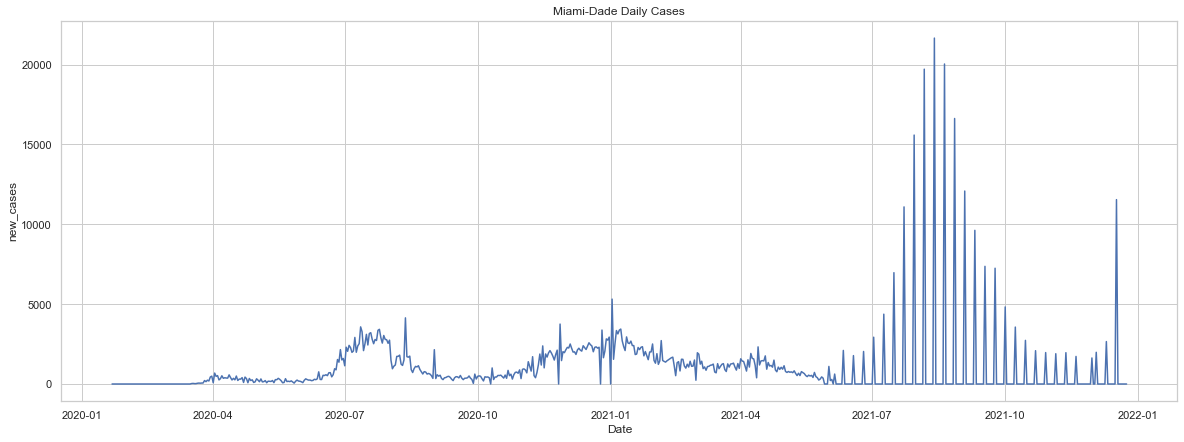

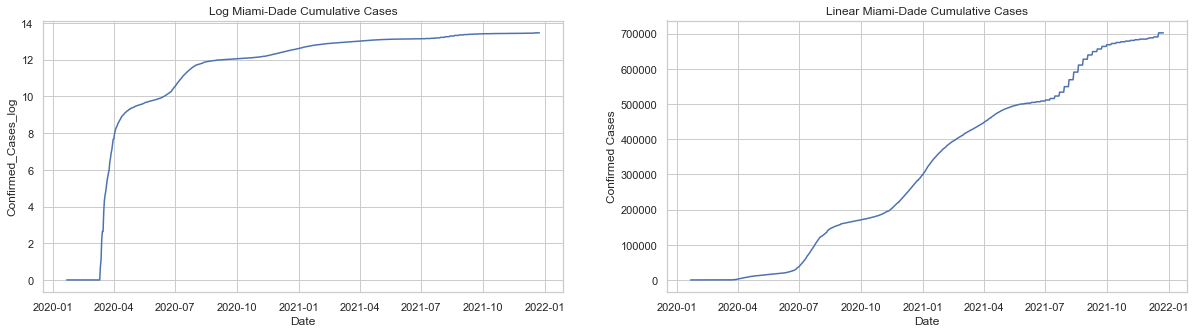

In [8]:
x = 'Miami-Dade'
y = '01-01-2020'


z=df_c[(df_c['Admin2']==x) & (df_c['Date']>y)]

plt.figure(figsize=(20,7))
ax = sns.lineplot(x='Date', y= "new_cases",data= z )
ax.set_title(x + ' Daily Cases')


fig, axs = plt.subplots(ncols=2,figsize=(20.5,5))

ax = sns.lineplot(x='Date', y= "Confirmed_Cases_log",data= df_c[df_c['Admin2']==x],ax=axs[0])
ax.set_title('Log '+ x + ' Cumulative Cases')
#ax.set(xscale='log')

bx= sns.lineplot(x='Date', y= "Confirmed Cases",data= z,ax=axs[1])
bx.set_title('Linear '+ x + ' Cumulative Cases')
#bx.set(xscale='linear')


plt.show()

#https://www.weforum.org/agenda/2020/04/covid-19-spread-logarithmic-graph/

In [9]:
lc= df_c[(df_c['Date']=='2021-12-19')].sort_values(by='Confirmed Cases',ascending=False).head(10)
lc [['Combined_Key','Confirmed Cases','Confirmed_Cases_log','new_cases']]

,Combined_Key,Confirmed Cases,Confirmed_Cases_log,new_cases
2329589,"Los Angeles, California, US",1563879,14.262680,3502.0
2329484,"Maricopa, Arizona, US",841448,13.642881,1968.0
2330016,"Cook, Illinois, US",721308,13.488823,0.0
2329758,"Miami-Dade, Florida, US",702309,13.462130,0.0
2332174,"Harris, Texas, US",602207,13.308358,2447.0
2332130,"Dallas, Texas, US",424524,12.958726,600.0
2329608,"San Diego, California, US",420137,12.948339,0.0
2329604,"Riverside, California, US",398997,12.896712,1961.0
2329607,"San Bernardino, California, US",385963,12.863499,1833.0
2332294,"Tarrant, Texas, US",377638,12.841694,0.0


In [10]:
#df['SMA_3'] = df.iloc[:,1].rolling(window=3).mean()

In [11]:
df.shape[0]-2

2349424

# Notes

Ideas


Map Plot
7/14/21,28 day avg
forecasting